<a href="https://colab.research.google.com/github/venkat2ram/tf_cert_practice/blob/main/Conv_Fashoin_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
import math as math

In [3]:
dataset,meta_data=tfds.load('fashion_mnist',with_info=True,as_supervised=True)

In [4]:
train_data=dataset['train']
test_data=dataset['test']

In [5]:
num_train_data=meta_data.splits['train'].num_examples
num_test_data=meta_data.splits['test'].num_examples

In [6]:
meta_data

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.1,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

In [7]:
def normalize(image,label):
  image=tf.cast(image,tf.float32)
  image=image/255
  return image,label

In [8]:
train_data=train_data.map(normalize)
test_data=test_data.map(normalize)

In [9]:
for image,label in train_data.take(1):
  break

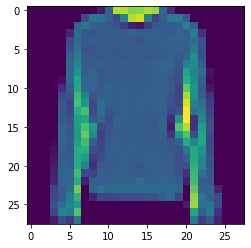

In [10]:
plt.imshow(image.numpy().reshape(28,28))

In [11]:
BATCH_SIZE=32
train_data=train_data.cache().repeat().shuffle(num_train_data).batch(BATCH_SIZE)
test_data=test_data.cache().batch(BATCH_SIZE)

In [12]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),padding='same',activation=tf.nn.relu,input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D((2,2),strides=2),
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D((2,2),strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')]
)

In [13]:
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics='accuracy')

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [15]:
history=model.fit(train_data,epochs=15,steps_per_epoch=math.ceil(num_train_data/BATCH_SIZE),validation_data=test_data)

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4050 - accuracy: 0.8538 - val_loss: 0.3284 - val_accuracy: 0.8793
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2635 - accuracy: 0.9033 - val_loss: 0.2813 - val_accuracy: 0.8983
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2163 - accuracy: 0.9198 - val_loss: 0.2522 - val_accuracy: 0.9079
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1829 - accuracy: 0.9320 - val_loss: 0.2357 - val_accuracy: 0.9116
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1571 - accuracy: 0.9413 - val_loss: 0.2489 - val_accuracy: 0.9128
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1367 - accuracy: 0.9498 - val_loss: 0.2438 - val_accuracy: 0.9227
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1128 - accuracy: 0.9580 - val_loss: 0.2624 - val_accuracy:

In [16]:
class_names=meta_data.features['label'].names

In [17]:
for im,la in test_data.take(1):
  break;

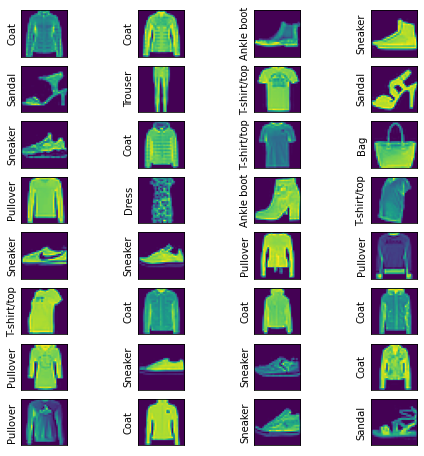

In [18]:
plt.figure(figsize=(8,8))
for a in range(32):
  x=im[a].numpy().reshape(28,28)
  plt.subplot(8,4,a+1)
  plt.xticks([])
  plt.yticks([])
  plt.ylabel(class_names[la.numpy()[a]])
  plt.grid(False)
  plt.imshow(x)

In [19]:
la1=model.predict(im)

In [20]:
la1=la1.argmax(axis=1)

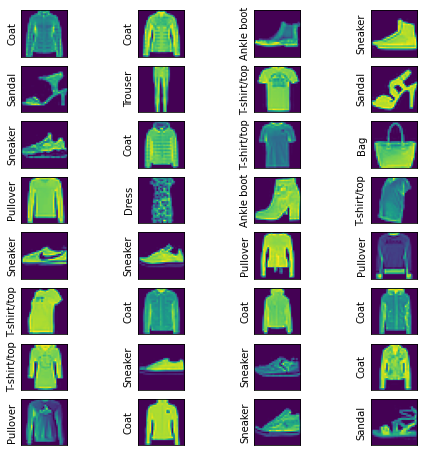

In [21]:
plt.figure(figsize=(8,8))
for a in range(32):
  x=im[a].numpy().reshape(28,28)
  plt.subplot(8,4,a+1)
  plt.xticks([])
  plt.yticks([])
  plt.ylabel(class_names[la1[a]])
  plt.grid(False)
  plt.imshow(x)

In [22]:
train_accuracy=history.history['accuracy']
train_loss=history.history['loss']
val_accuracy=history.history['val_accuracy']
val_loss=history.history['val_loss']

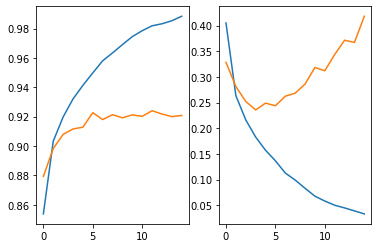

In [23]:
plt.subplot(1,2,1)
plt.plot(train_accuracy)
plt.plot(val_accuracy)
plt.subplot(1,2,2)
plt.plot(train_loss)
plt.plot(val_loss)